In [75]:
import torch
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [212]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
X = mnist.data
y = mnist.target

In [213]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y.shape

(70000,)

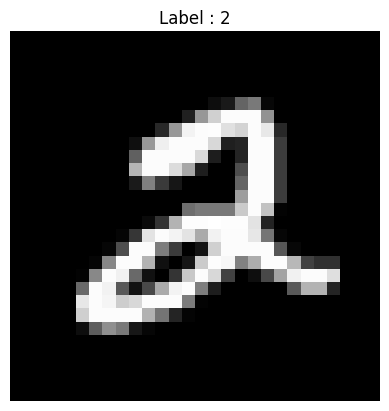

In [58]:
index = 5
image = X.iloc[index].values.reshape(28,28)
label = y[index]
plt.figure()
plt.imshow(image, cmap="gray")
plt.title(f"Label : {label}")
plt.axis("off")
plt.show()

In [59]:
# class label is between 0 to 9

In [214]:
X = X.to_numpy() #converting X which was pd dataframe to numpy

In [215]:
y = y.values.astype(np.int64)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.int64)

In [216]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, train_size=0.25, random_state=42)

In [217]:
X_test.shape

torch.Size([17500, 784])

In [218]:
X_train.shape

torch.Size([52500, 784])

In [219]:
from torch import nn
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [279]:
class mnist_model(nn.Module):
    def __init__(self):
        super().__init__()
        #create 2 layers one is input and other is output layer
        self.layer1 = nn.Linear(in_features=784, out_features=128)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(in_features=128, out_features=10)
        #create a forward function
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [280]:
model_0 = mnist_model().to(device)
model_0

mnist_model(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=128, out_features=10, bias=True)
)

In [281]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 17500, Shape: torch.Size([17500, 10])
Length of test samples: 17500, Shape: torch.Size([17500])

First 10 predictions:
tensor([[ 5.6441e+01,  6.3383e+00, -6.7213e+00,  2.4455e+00, -1.9352e+01,
          1.1581e+01, -3.1101e+01,  2.9856e+01, -8.4471e+00,  9.4626e+00],
        [ 4.6799e+01,  6.5031e+00, -1.1047e+01, -2.5065e+01, -2.0394e+01,
          1.7400e+00, -2.0380e+01,  3.1766e+01,  3.4530e+00,  7.2472e+00],
        [ 5.1323e+01,  8.0516e+00, -3.0496e+00,  3.3722e+00, -3.2814e+00,
          1.9023e-01, -1.9986e+01,  3.2647e+01, -1.1232e+01,  5.9703e+00],
        [ 4.8727e+01,  1.3260e+01, -8.4357e+00, -1.2120e+01, -6.2521e+00,
         -9.0604e+00, -2.9280e+01,  4.0101e+01, -1.4432e+01, -5.8897e+00],
        [ 3.1396e+01, -2.4604e+01, -1.9090e+01, -3.3081e+00, -1.9949e+01,
         -1.9299e+01, -2.8879e+01,  3.2090e+01,  6.6742e+00,  1.1663e+01],
        [ 1.7047e+01, -4.7166e-02, -1.2469e+00, -7.2190e+00,  7.1086e+00,
          3.3001e+00, -9.0605e+00,  8.0

In [282]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

In [283]:
def accuracy_func(y_test, y_pred):
    correct = torch.eq(y_test, y_pred).sum().item()
    acc = (correct / len(y_test)) * 100
    return acc

In [284]:
y_pred = model_0(X_test.to(device))[:5]
y_pred = torch.max(y_pred, dim= 1)
y_pred = y_pred.indices
print(y_pred)
print(y_test[:5])

tensor([0, 0, 0, 0, 7], device='mps:0')
tensor([2, 8, 8, 8, 7], device='mps:0')


In [285]:
y_train.dtype

torch.int64

In [286]:
#training of model
torch.manual_seed = 42
epochs = 2000
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
    #training
    model_0.train()
    #forward pass
    y_temp = model_0(X_train)
    y_pred = torch.max(y_temp, dim= 1)
    y_pred = y_pred.indices
    #loss calculation
    loss = loss_fn(y_temp, y_train)
    acc = accuracy_func(y_test = y_train, y_pred = y_pred)
    #zero_grad
    optimizer.zero_grad()
    #backward
    loss.backward()
    #optimizer step up
    optimizer.step()

    #testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test)
        y_pred1 = torch.max(test_logits, dim= 1)
        y_pred1 = y_pred1.indices
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_func(y_test=y_test,
                               y_pred=y_pred1)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}, y_pred: {y_pred[:5]} | y_train : {y_train[:5]}, y_pred1:{y_pred1[:5]} | y_test : {y_test[:5]}%")

Epoch: 0 | Loss: 43.08871, Accuracy: 9.38% | Test loss: 562.77551, Test acc: 11.10, y_pred: tensor([0, 0, 0, 0, 0], device='mps:0') | y_train : tensor([8, 4, 8, 7, 7], device='mps:0'), y_pred1:tensor([2, 2, 2, 2, 2], device='mps:0') | y_test : tensor([2, 8, 8, 8, 7], device='mps:0')%
Epoch: 100 | Loss: 1.50985, Accuracy: 47.31% | Test loss: 1.53423, Test acc: 46.96, y_pred: tensor([7, 8, 7, 7, 7], device='mps:0') | y_train : tensor([8, 4, 8, 7, 7], device='mps:0'), y_pred1:tensor([6, 1, 1, 8, 7], device='mps:0') | y_test : tensor([2, 8, 8, 8, 7], device='mps:0')%
Epoch: 200 | Loss: 0.56177, Accuracy: 82.84% | Test loss: 0.57292, Test acc: 83.25, y_pred: tensor([8, 4, 8, 7, 7], device='mps:0') | y_train : tensor([8, 4, 8, 7, 7], device='mps:0'), y_pred1:tensor([2, 8, 1, 8, 7], device='mps:0') | y_test : tensor([2, 8, 8, 8, 7], device='mps:0')%
Epoch: 300 | Loss: 0.37421, Accuracy: 88.74% | Test loss: 0.42738, Test acc: 88.29, y_pred: tensor([8, 4, 8, 7, 7], device='mps:0') | y_train : t

tensor(2)


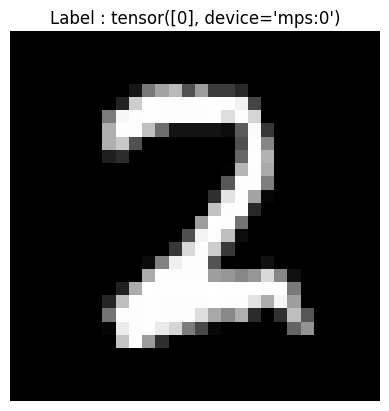

In [256]:
import pandas as pd
index = 0
X_temp = X_test.numpy()
X_temp = pd.DataFrame(X_temp)
model_0.eval()
with torch.inference_mode():
    # 1. Forward pass
    temp = X_test.to(device)
    test_logits = model_0(temp[[index]])
    y_pred2 = torch.max(test_logits, dim= 1)
    y_pred2 = y_pred2.indices
image = X_temp.iloc[index].values.reshape(28,28)
label = y_pred2
print(y_test[index])
plt.figure()
plt.imshow(image, cmap="gray")
plt.title(f"Label : {label}")
plt.axis("off")
plt.show()